<a href="https://colab.research.google.com/github/Shashank251225/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING







##### **Project Type**    - Unsupervised
##### **Contribution**-    Team
##### **Team Member 1 -** AMITHA K

##### **Team Member 2 -**APOORVA VISHWAKARMA

##### **Team Member 3 -**ABHISHEK P SADAWARTE

##### **Team Member 4 -**MOHD KHALID
##### **Team Member 5 -**SHASHANK KUMAR YADAV

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**




This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
In this project, I have done

 1.Exploratory Data Analysis

 2.Understanding what type content is available in different countries

 3.Is Netflix increasingly focusing on TV rather than movies in recent years.
 
 4.Clustering similar content by matching text-based features**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import datetime as dt

%matplotlib inline


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
netflix = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df = netflix.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

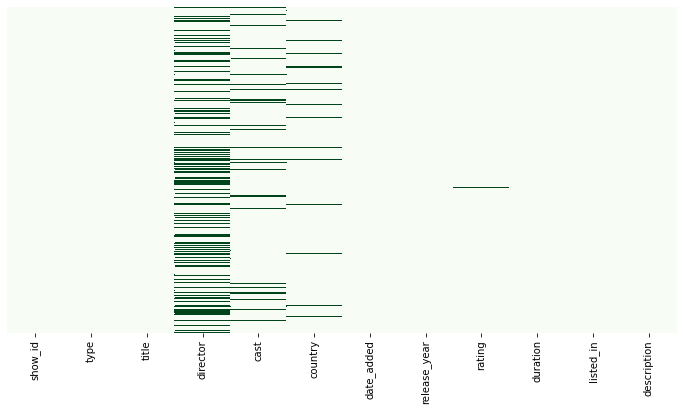

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='Greens');

In [ ]:
#HANDLING MISSING VALUES
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)
df['date_added'].fillna('unknown', inplace=True)
df['rating'].fillna('unknown', inplace=True)
     

### What did you know about your dataset?

There is a total of 7787 movies / TV shows that is rows and 12 columns in this dataset collected from AlmaBetter

Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating (ex. PG, PG-13, R, etc.), listed_in (genre), and plot description.Answer Here

We have 5 columns with missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'O').T

,count,unique,top,freq
show_id,7787,7787,s1,1
type,7787,2,Movie,5377
title,7787,7787,3%,1
director,7787,4050,unknown,2389
cast,7787,6832,unknown,718
country,7787,682,United States,2555
date_added,7787,1566,"January 1, 2020",118
rating,7787,15,TV-MA,2863
duration,7787,216,1 Season,1608
listed_in,7787,492,Documentaries,334


### Variables Description 


The dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Release Year of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genre

description: The Summary description
Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4050
cast            6832
country          682
date_added      1566
release_year      73
rating            15
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# CONVERTING 'date_added' to datetime format
def date(row):
  a = row['date_added']
  if 'unknown'  not in a:
    month = a.split()[0]
    year = a.split()[-1]
    day = a.split()[1].split(',')[0]
    a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
    return a
  else:
    return np.nan

df['date_added'] = df.apply(lambda x: date(x), axis=1)

## FEATURE ENGINEERING LISTED_IN 


In [ ]:
a = df.copy()

In [ ]:
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance', 
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality', 
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family', 
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [ ]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))
     

In [ ]:
(df.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

### What all manipulations have you done and insights you found?

Converted date added to date time format

FEATURE ENGINEERING LISTED_IN Genres are extracted and re-defined accordingly. TV and Movie genres are separately defined. These are combined. Topics like International TV Shows are removed as it could bring in a bias by displaying content in reference to American movies.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Figure size 1008x576 with 0 Axes>

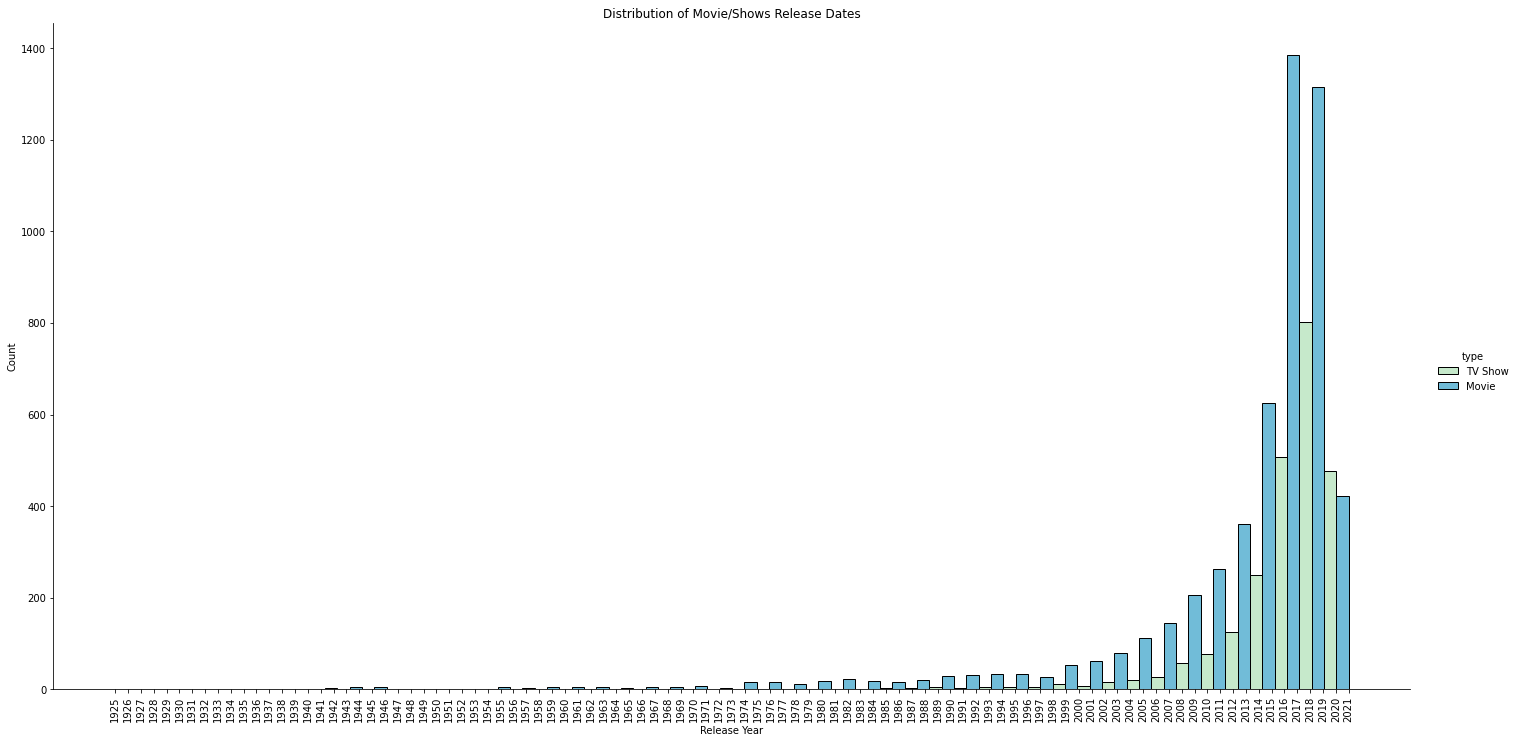

In [ ]:
# Chart - 1 visualization code
#Histogram plot of release dates of shows/movies on Netflix
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

Most Movies streaming on the platform were released after 2010
Most TV Shows streaming on the platform were released after 2015
The year 2017 had highest number of Movie and TV show releases on the platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the histogram plot we can see that the number of movies and tv shows are increasing in netflix platform and there is increasing trend during pandemic times.

#### Chart - 2

<Figure size 1008x576 with 0 Axes>

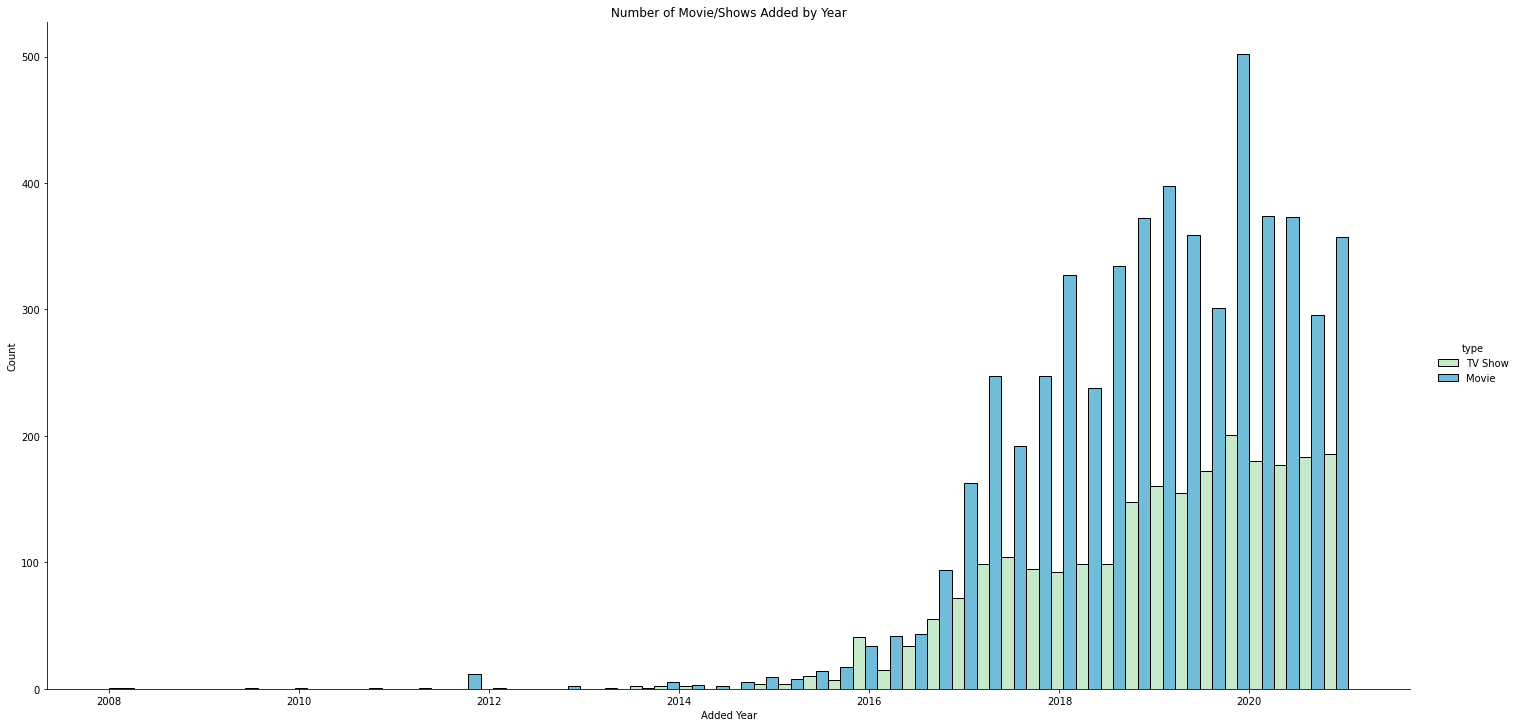

In [ ]:
# Chart - 2 visualization code
#Histogram plot of dates of number of shows/movies added by the Streaming giant
a = plt.figure(figsize=(14,8))
a = sns.displot(x= df['date_added'], hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')

##### 1. Why did you pick the specific chart?

 It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

Netflix began adding videos to the platform from 2008 The streaming giant started aggressively adding movies and TV shows from 2017 More movies are added as compared to TV shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that tv series are increasing trend as compared to movies , which are in reducing trend.

#### Chart - 3

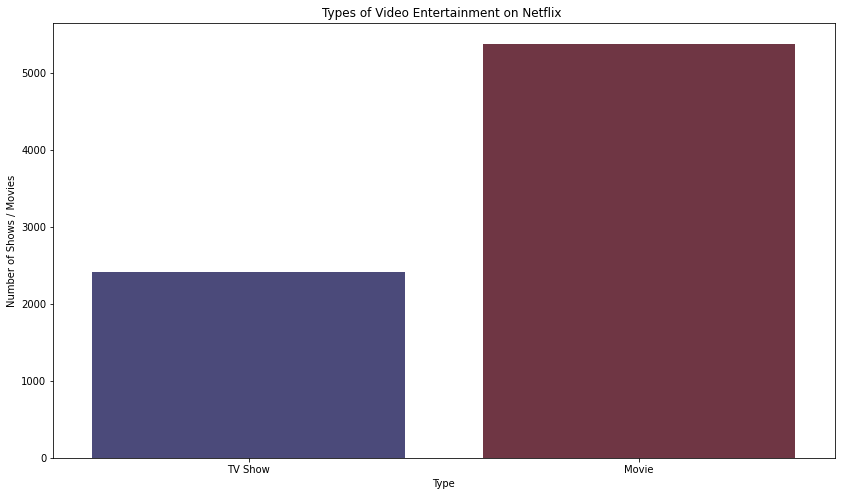

In [ ]:
# Chart - 3 visualization code
#Type of Videos on Netflix
a = plt.figure(figsize=(14,8))
a = sns.countplot(x= df['type'], data = df,palette='icefire')
a = plt.title('Types of Video Entertainment on Netflix ')
a = plt.xlabel('Type')
a = plt.ylabel('Number of Shows / Movies')

##### 1. Why did you pick the specific chart?

A count plot Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

Show the counts of observations in each categorical bin using bars.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

So we can see that netflix is focusing more on movies as compared to the tv series and in future also this trend might continue.

#### Chart - 4

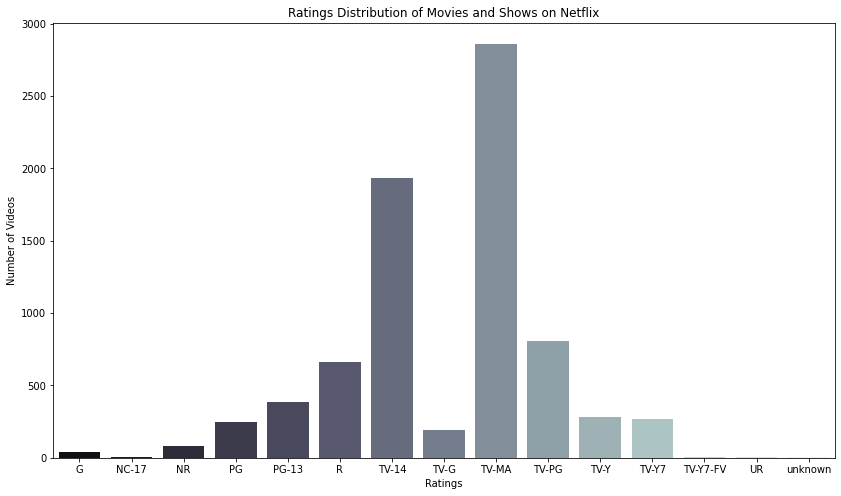

In [ ]:
# Chart - 4 visualization code
#Different Ratings on the Platform
a = plt.figure(figsize=(14,8))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= d['rating'], y=d['show_id'], palette='bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

##### 2. What is/are the insight(s) found from the chart?

Most content on Netflix is rated for Mature Audiences and over 14 years old

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix is targeting the older people as compared to the younger generation.
Netflix should try to focus more on younger audiances.

#### Chart - 5

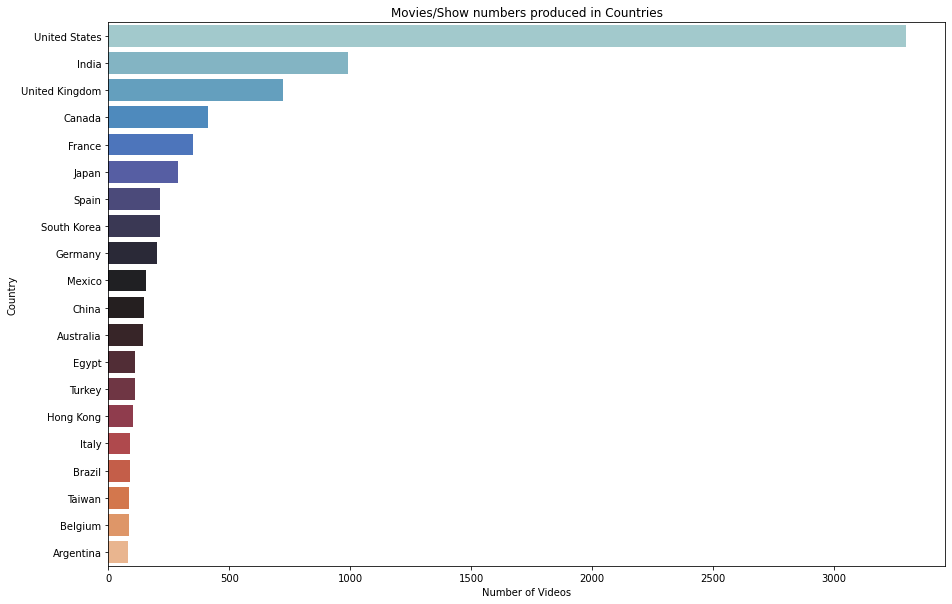

In [ ]:
# Chart - 5 visualization code
#Top 10 Countries that produced content on Netflix
a = df[df.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='icefire')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars it can be used to compare different values.

##### 2. What is/are the insight(s) found from the chart?

Top Countries in Netflix are:

1.United States 2.India 3.United Kingdom 4.Canada 5.France

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Majority of videos are produced in usa and then india so netflix should try to target other regions too .

#### Chart - 6

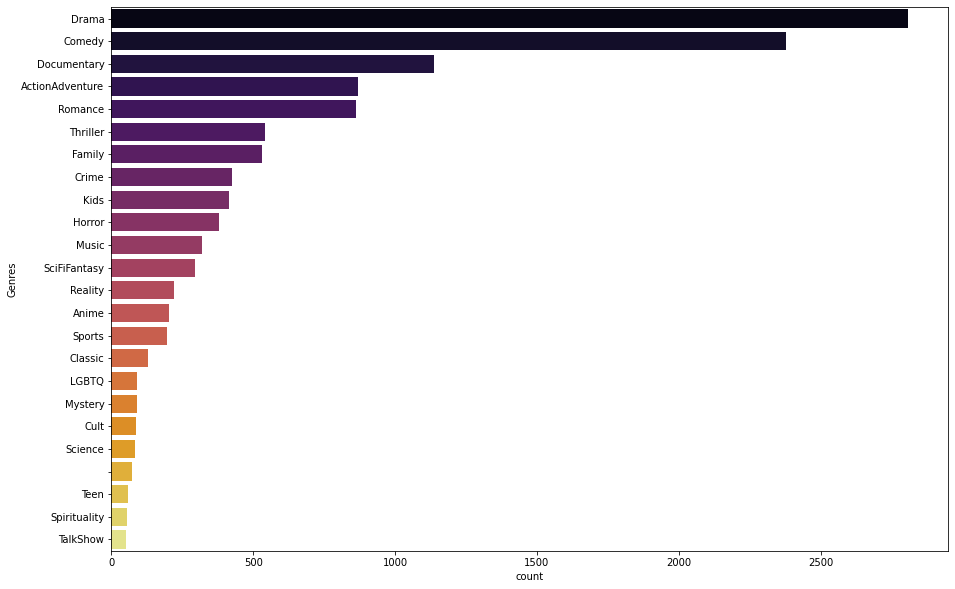

In [ ]:
# Chart - 6 visualization code
#Top Genres on Netflix
a = df.loc[:,['show_id','title','country', 'Genres']].copy()
a = a.explode('Genres')
genre_list = a.Genres.unique()
group = a.groupby('Genres').agg(count = ('show_id','count')).sort_values('count', ascending= False).reset_index()
plt.figure(figsize=(15,10))
_ = sns.barplot(y = 'Genres', x = 'count',data = group , palette='inferno')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars and we wanted to know which genre is most in demand so its best to show it.

##### 2. What is/are the insight(s) found from the chart?

 Top Genres in Netflix are:

1.Drama 2.Comedy 3.Documentary 4.Action and Adventure 5.Romance

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix should need to target other genres too so as to get high viewership and get wide range of audiances

#### Chart - 7

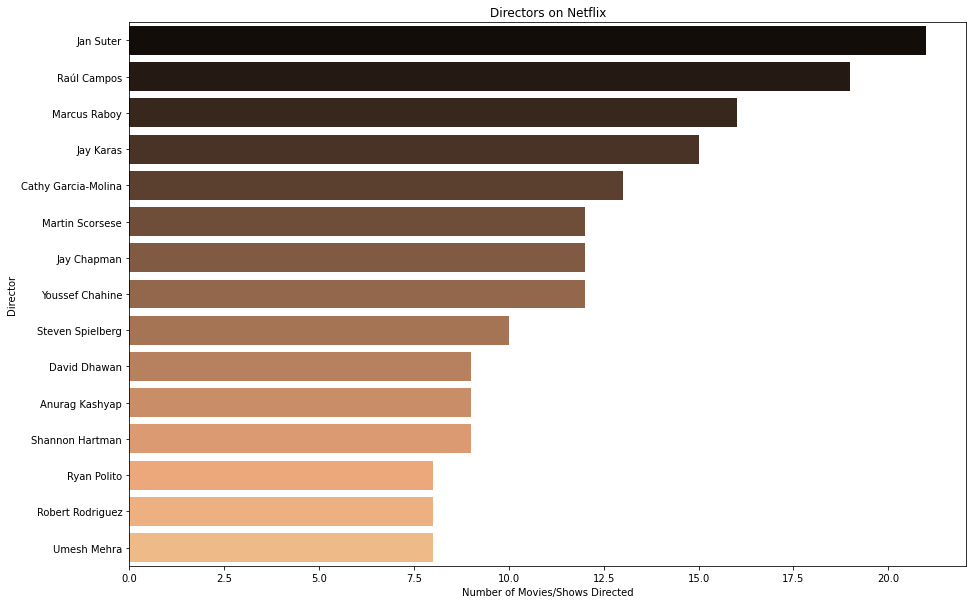

In [ ]:
# Chart - 7 visualization code
#Frequent Directors on Netflix
a=df[df.director != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Director' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(15)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'id',data = a , palette= 'copper')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10directors = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(10)['Director'].to_list()

##### 1. Why did you pick the specific chart?

To know which diretor is frequently directed a movie or a series or most successful director we used bar plot.

##### 2. What is/are the insight(s) found from the chart?

Top Directors on Netflix are:

1.Jan Suter 2.Raul Campos 3.Marcus Raboy 4.Jay Karas 5.Cathy Garcia-Molina

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Jan Suter is most common director in netflix so he might be highly loved by the audiences, he and other top directors need to be utilised for further movies in future.

#### Chart - 8

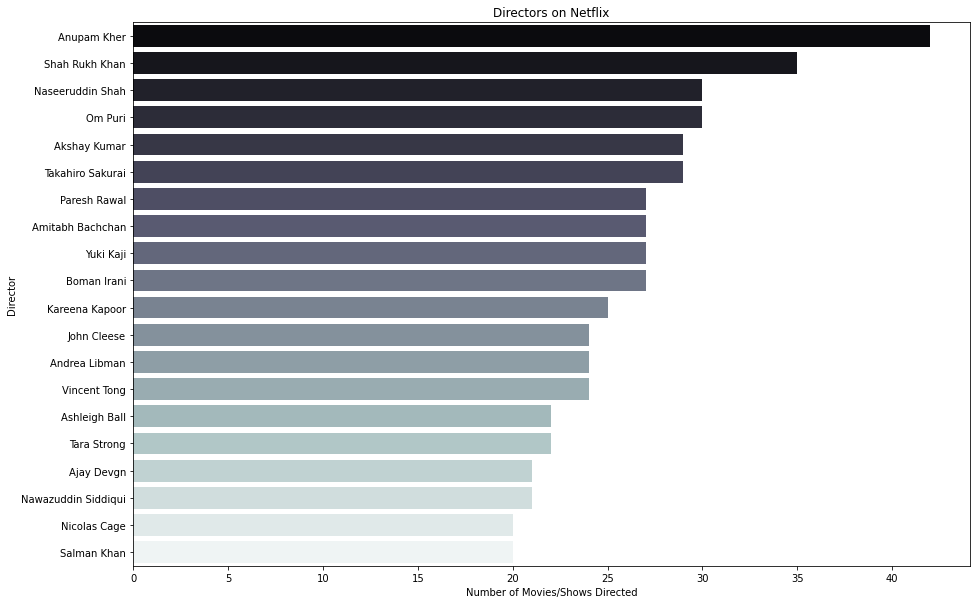

In [ ]:
# Chart - 8 visualization code
#Frequent Cast on Netflix
a=df[df.cast != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for genre in cast:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Actor' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Actor', x = 'id',data = a , palette= 'bone')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10actors = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()['Actor'].to_list()

##### 1. Why did you pick the specific chart?

To know which diretor is frequently directed a movie or a series or most successful director we used bar plot.

##### 2. What is/are the insight(s) found from the chart?

 Top Actors on Netflix are:

1.Anupam Kher 2.Shah Rukh Khan 3.Naseeruddin Shah 4.Om Puri 5.Akshay Kumar

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Indian actors like anupam kher , shahruk khan and other are frequently used in movies so that means people like them a lot and their movies and tv shows need to be promoted.

#### Chart - 9

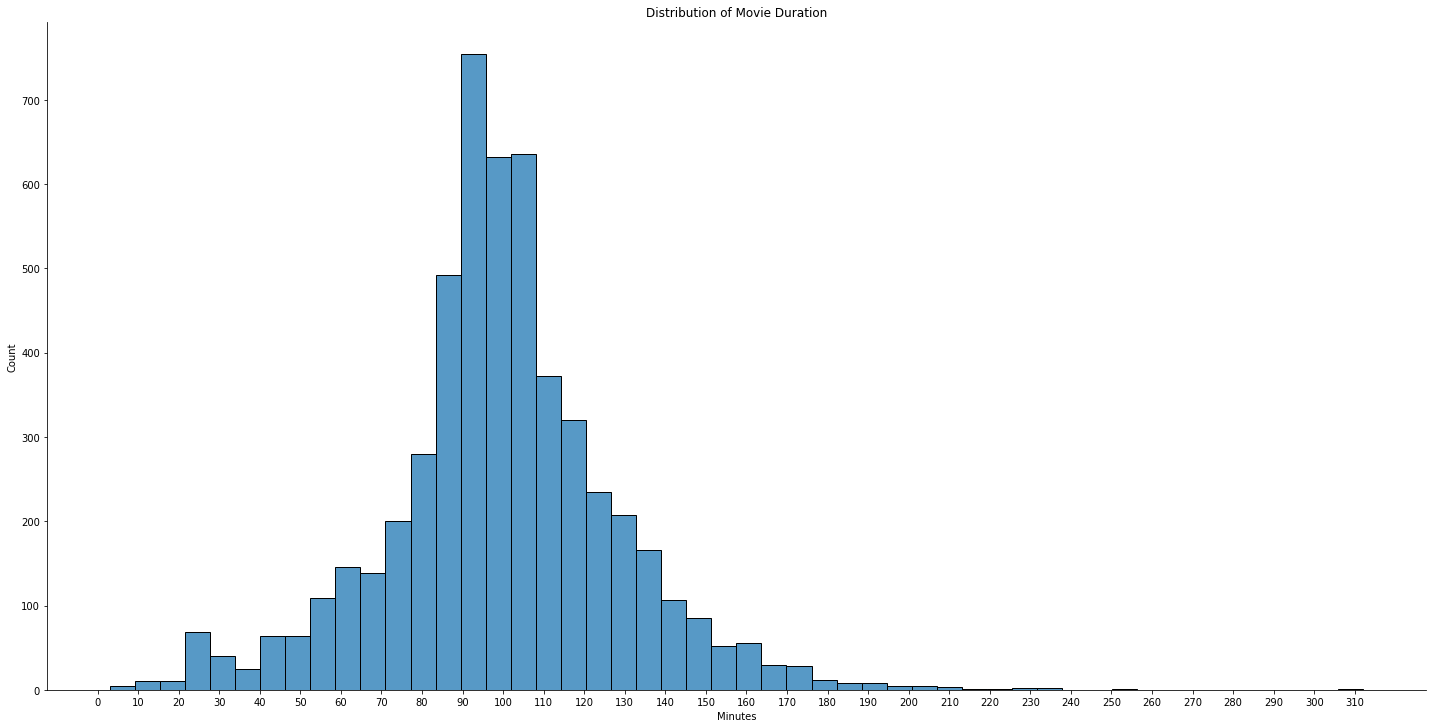

In [ ]:
# Chart - 9 visualization code
#Duration of Movies on Netflix
a=df[df['type']=='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Duration' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Duration',  data = country_list, kind = 'hist', height=10, aspect=2, bins = 50)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,country_list.Duration.max()+1,10))

##### 1. Why did you pick the specific chart?

Bar plot is used to know the time duration of each movies in netflix

##### 2. What is/are the insight(s) found from the chart?

Most movies on Netflix have a duration range from 90 to 110 minutes

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the movies in netflix is around 1 hour and 30mins long approx ,  so people dont like long movies .

#### Chart - 10

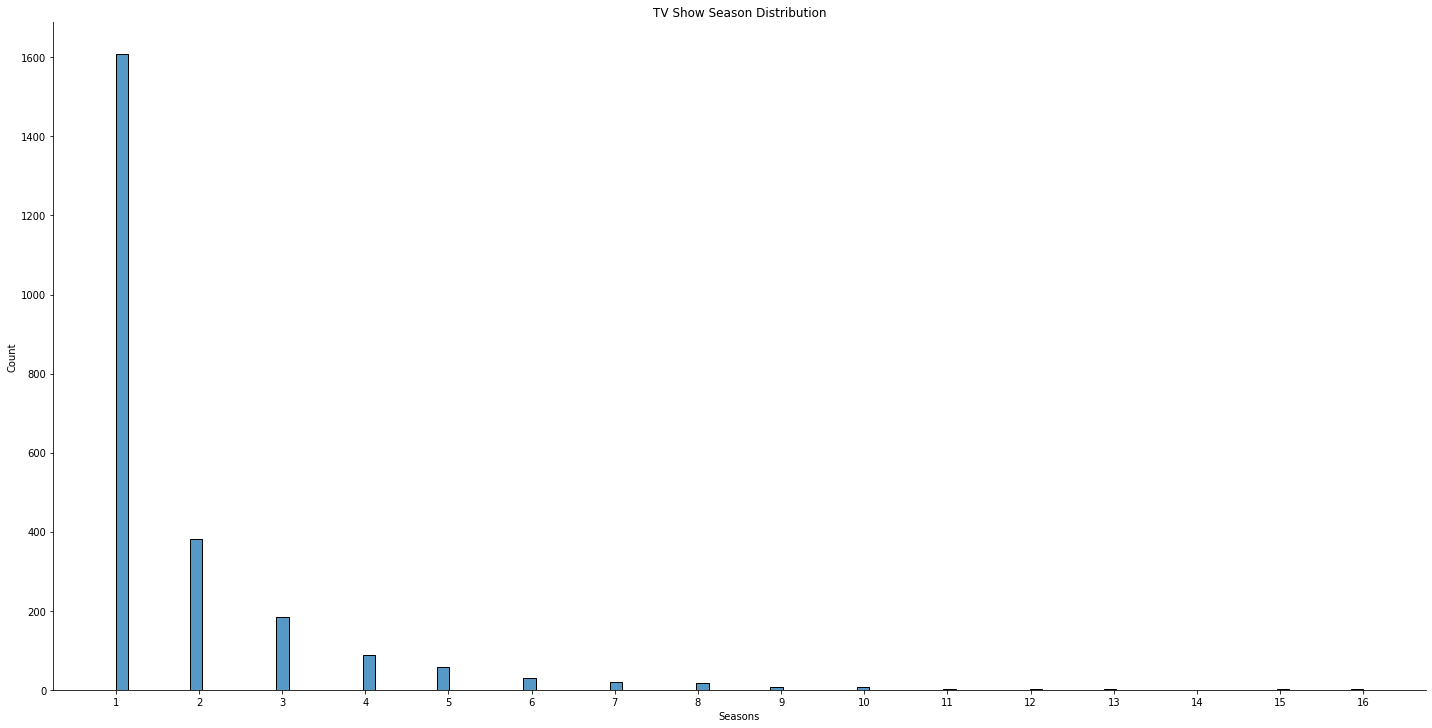

In [ ]:
# Chart - 10 visualization code
#Duration of TV shows on Netflix
a=df[df['type']!='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Seasons' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Seasons',  data = country_list, kind = 'hist', height=10, aspect=2)
a = plt.title('TV Show Season Distribution')
a = plt.xlabel('Seasons')
a = plt.xticks(ticks = np.arange(country_list.Seasons.min(),country_list.Seasons.max()+1,1))

##### 1. Why did you pick the specific chart?

Bar plot is used to depict the number of seasons in each series.

##### 2. What is/are the insight(s) found from the chart?

Most TV shows on Netflix have a span of 1 season only.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most tv shows in netflix is just 1 season long , so people mostly like small series.

#### Chart - 11

In [ ]:
#Has Netflix Been Focusing Increasingly on TV Shows as compared to movies
content = df.loc[:,['title','date_added','release_year', 'duration', 'type']].dropna().copy()

In [ ]:
content['date_added'] = content['date_added'].dt.year

In [ ]:
#Assuming TV shows release new seasons every year, we'll be adding a duplicate of the show for each season.
def season(row):
  release = row['release_year']
  added = row['date_added']

  if row['type'] =='TV Show':
    seasons = int(row['duration'][0])
    b = []
    for i in range(1, seasons+1):
      if i ==1:
        b.append(release)
      else:
        b.append(b[-1]-1)
    a = b
  else:
    a = []
    a.append(row['release_year'])      
  
  return a

content['Released Years'] = content.apply(lambda x: season(x),axis=1)

In [ ]:
compare = content.explode('Released Years')

In [ ]:
tv = compare[compare['type'] == 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [ ]:
data = pd.concat([tv, movie], axis = 0)

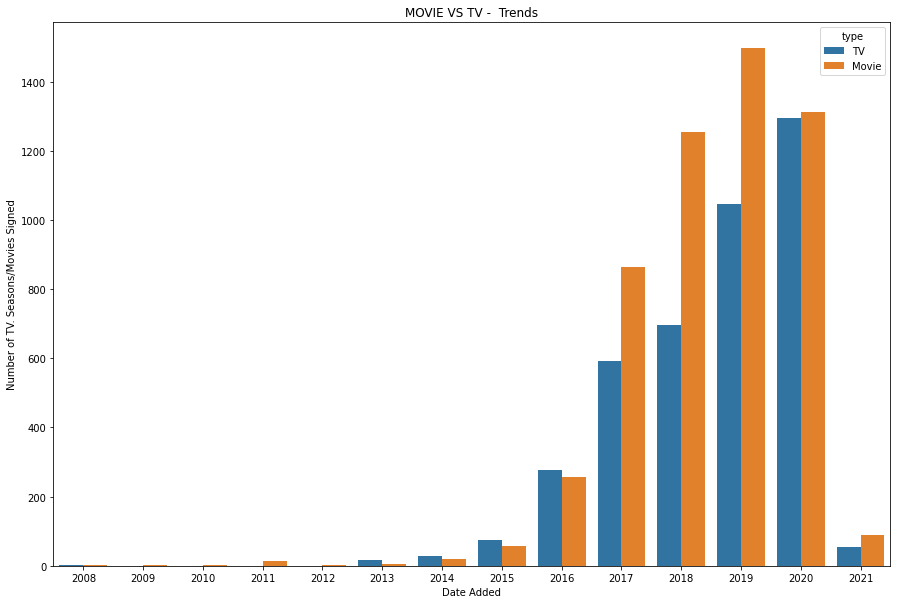

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'date_added', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Date Added')
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')

##### 1. Why did you pick the specific chart?

Bar plot is used to compare number of movies and tv shows signed.

##### 2. What is/are the insight(s) found from the chart?

The above graph depicts seasons of TV shows signed vs the movies signed This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

number of tv shows and movies signed are at par with each other since past few years.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
# Tv shows vs movies release year
tv = compare[compare['type'] == 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'
     

In [ ]:
data = pd.concat([tv, movie], axis = 0)

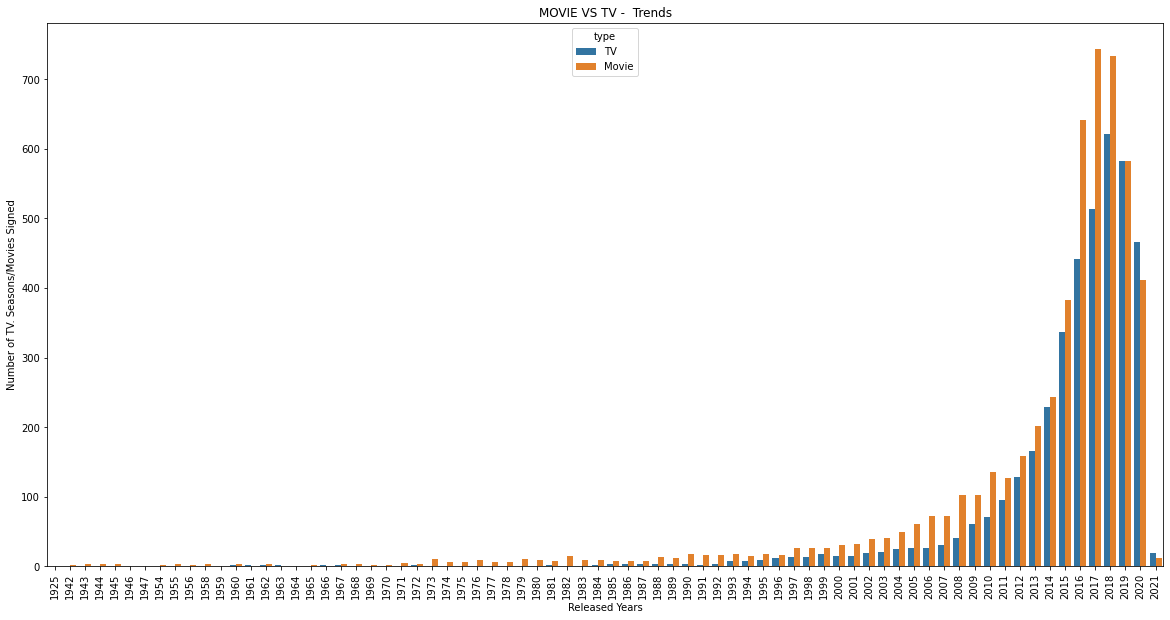

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Released Years', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Released Years')
plt.xticks(rotation = 90)
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')

##### 1. Why did you pick the specific chart?

Bar plot is used to show comparison between tv shows and movies realease year.

##### 2. What is/are the insight(s) found from the chart?

The above graph depicts an estimation of seasonal TV show and Movie release date per each year. We make a general assumption that each show releases a season yearly which is often the case for most TV shows. There are certainly exemptions. Eg. Ozark was released in years 2017, 2018, 2020 and 2022. [ P.S: Brilliant slow burn. Do check it out! ] We can observe that TV releases outnumbering movies from 2010. It is a known fact that each show contains multiple episodes, hence we can confidently say that significant amount of video content is being enlisted under TV shows from 2010 Years 2019, 2020 and 2021 see multi-episode TV seasons outnumbering movies signed per year

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is high trend of tv shows compared to movies.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genres
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[Drama, SciFiFantasy]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[Horror]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[ActionAdventure, SciFiFantasy]"
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,[Drama]


In [ ]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [ ]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df_hypothesis['target_ages'] = df_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages 
df_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', 'unknown'], dtype=object)

In [ ]:
#Another category is target_ages (4 classes).
df_hypothesis['target_ages'] = pd.Categorical(df_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genres,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Drama],Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[Horror],Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[ActionAdventure, SciFiFantasy]",Teens


In [ ]:
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [ ]:

#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


<ipython-input-48-0e65087deef1>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M1 = A.mean()
<ipython-input-48-0e65087deef1>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  S1 = A.std()
<ipython-input-48-0e65087deef1>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M2= B.mean()
<ipython-input-48-0e65087deef1>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only va

In [ ]:

#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

T-values are a type of test statistic. Hypothesis tests use the test statistic that is calculated from your sample to compare your sample to the null hypothesis. If the test statistic is extreme enough, this indicates that your data are so incompatible with the null hypothesis that you can reject the null.

##### Why did you choose the specific statistical test?

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, movies rated for kids and older kids are not at least two hours long.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genres
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[Drama, SciFiFantasy]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[Horror]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","[ActionAdventure, SciFiFantasy]"
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,[Drama]


In [ ]:
df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_

In [ ]:
df_hypothesis['type'] = pd.Categorical(df_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
df_hypothesis.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genres
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"[Drama, SciFiFantasy]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",[Horror]


In [ ]:
#group_by duration and TYPE                 
group_by_= df_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.307978
1,TV Show,1.775934


In [ ]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


<ipython-input-56-0f10debe6e90>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M1 = A.mean()
<ipython-input-56-0f10debe6e90>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  S1 = A.std()
<ipython-input-56-0f10debe6e90>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  M2= B.mean()
<ipython-input-56-0f10debe6e90>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only va

In [ ]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])
     

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


In [ ]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

##### Which statistical test have you done to obtain P-Value?

T-values are a type of test statistic. Hypothesis tests use the test statistic that is calculated from your sample to compare your sample to the null hypothesis. If the test statistic is extreme enough, this indicates that your data are so incompatible with the null hypothesis that you can reject the null.

##### Why did you choose the specific statistical test?

Because the t-value is not in the range, the null hypothesis is rejected.

As a result, The duration which is more than 90 mins are movies

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation 
#HANDLING MISSING VALUES
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)
df['date_added'].fillna('unknown', inplace=True)
df['rating'].fillna('unknown', inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

fillna() manages and let the user replace NaN values with some value of their own

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#not required

#### What all categorical encoding techniques have you used & why did you use those techniques?

not needed

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

This process involves converting the 'Description' of the show/movie into a machine interprettable form. Here we convert all text to lower case, remove punctuations and remove irrelevant words (so that only words that provide context are retained). Here similar words are unified to save memory and processing time as well. Individual words and group of words (n grams) are also collected to extract context related details.

## FEATURE ENGINEERING LISTED_IN

In [ ]:
a = df.copy()

In [ ]:
a['listed_in'] = a.listed_in.apply(lambda row: row.split(', '))
a.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [ ]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance', 
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality', 
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family', 
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy', 
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [ ]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []
 
  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))
  

df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))

In [ ]:
(df.explode('Genres')['Genres'].unique())

array(['Drama', 'SciFiFantasy', 'Horror', 'ActionAdventure', 'Mystery',
       'Thriller', 'Crime', 'Documentary', 'Sports', 'Comedy', 'Anime',
       'Reality', 'Romance', 'Science', '', 'Music', 'LGBTQ',
       'Spirituality', 'Kids', 'Family', 'Classic', 'Cult', 'TalkShow',
       'Teen'], dtype=object)

In [ ]:
df['Genres']

0                 [Drama, SciFiFantasy]
1                               [Drama]
2                              [Horror]
3       [ActionAdventure, SciFiFantasy]
4                               [Drama]
                     ...               
7782                            [Drama]
7783                     [Drama, Music]
7784               [Documentary, Music]
7785                          [Reality]
7786               [Documentary, Music]
Name: Genres, Length: 7787, dtype: object

## COMBINING Top CAST, DIRECTOR and ListedIn into single text attributes

We are extracting non-plot related text details about the movie/show like lead actors, director, country and categories it is being listed in on the platform

In [ ]:
def combine(row):
  text = ' '.join(row['Genres']).lower()
  if row['cast'] != 'unknown':
    cast_list = [actor.replace(' ', '') for actor in row['cast'].split(', ')]
    if len(cast_list) < 5:
      text = text + ' ' + ' '.join(cast_list[:]).lower()
    else :
      text = text + ' ' + ' '.join(cast_list[:5]).lower()
  if row['director'] !='unknown':
    director_list = ' '.join([director.replace(' ', '') for director in row['director'].split(', ')])
    text = text + ' ' + director_list.lower()

  return text
df['Movie Deets'] = df.apply(lambda row: combine(row), axis = 1)

In [ ]:
df.head()['Movie Deets'].to_list()

['drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira',
 'drama demiánbichir héctorbonilla oscarserrano azaliaortiz octaviomichel jorgemichelgrau',
 'horror teddchan stellachung henleyhii lawrencekoh tommykuan gilbertchan',
 'actionadventure scififantasy elijahwood johnc.reilly jenniferconnelly christopherplummer crispinglover shaneacker',
 'drama jimsturgess kevinspacey katebosworth aaronyoo lizalapira robertluketic']

In [ ]:
#importing necessary libraries for text processing
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## WORD TOKENIZATION

Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

In [ ]:
import string

In [ ]:
def tokenizer(txt):  
  tokens = word_tokenize(txt) 
  
  return tokens
df['Processed Description'] = df['description'].apply(tokenizer)
df['Processed Movie Deets'] = df['Movie Deets'].apply(tokenizer)

#### 1. Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
regular_punct = list(string.punctuation)
def remove_punctuation(text,punct_list):
  tokens = text
  new_tok = []
  for i in tokens:
    word = i
    for punctuation in list(string.punctuation):
      word = word.replace(punctuation, ' ')
    if word.replace(' ','').isalnum():
      new_tok.append(word)

  return ' '.join(new_tok).split(' ')

df['Processed Description'] = df['Processed Description'].apply(lambda x : remove_punctuation(x, regular_punct))
df['Processed Movie Deets'] = df['Processed Movie Deets'].apply(lambda x : remove_punctuation(x, regular_punct))



#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
stop_words = set(stopwords.words('english')) 

def remove_stop(tokens, stopwords):
  return [t.lower() for t in tokens if t.lower() not in stopwords]


df['Processed Description'] = df['Processed Description'].apply(lambda x : remove_stop(x, stop_words))

a = df.copy() #will be used for wordcloud later on

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
def tokenizer(txt):  
  tokens = word_tokenize(txt) 
  
  return tokens
df['Processed Description'] = df['description'].apply(tokenizer)
df['Processed Movie Deets'] = df['Movie Deets'].apply(tokenizer)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
ps = PorterStemmer()

def stem_text(text):  
  stemmed = []
  for word in text:
    stemmed.append(ps.stem(word))
  return stemmed


df['Processed Description'] = df['Processed Description'] .apply(lambda x : stem_text(x))

In [ ]:
def joiner(text_list):
  new = []
  for text in text_list:
    if text == ' ' or text == '' :
      pass
    else:
      new.append(text)
      
  return ' '.join(new)

df['Processed Description'] = df['Processed Description'] .apply(lambda x : joiner(x))
df['Processed Movie Deets'] = df['Processed Movie Deets'].apply(lambda x : joiner(x))

In [ ]:
df.loc[:,['description','Processed Description','Movie Deets',	'Processed Movie Deets']].head(1).T

,0
description,In a future where the elite inhabit an island ...
Processed Description,in a futur where the elit inhabit an island pa...
Movie Deets,drama scififantasy joãomiguel biancacomparato ...
Processed Movie Deets,drama scififantasy joãomiguel biancacomparato ...


##### Which text normalization technique have you used and why?

We used stemming .

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
count_vectorizer = CountVectorizer(min_df = 10,max_df=0.5)
count_description_vector = count_vectorizer.fit_transform(df['Processed Description'])

count_movie_vector = count_vectorizer.fit_transform(df['Processed Movie Deets'])

In [ ]:
count_description_vector.shape

(7787, 2227)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pd.concat([pd.DataFrame(count_description_vector.todense()), pd.DataFrame(count_movie_vector.todense())],axis =1))

PCA()

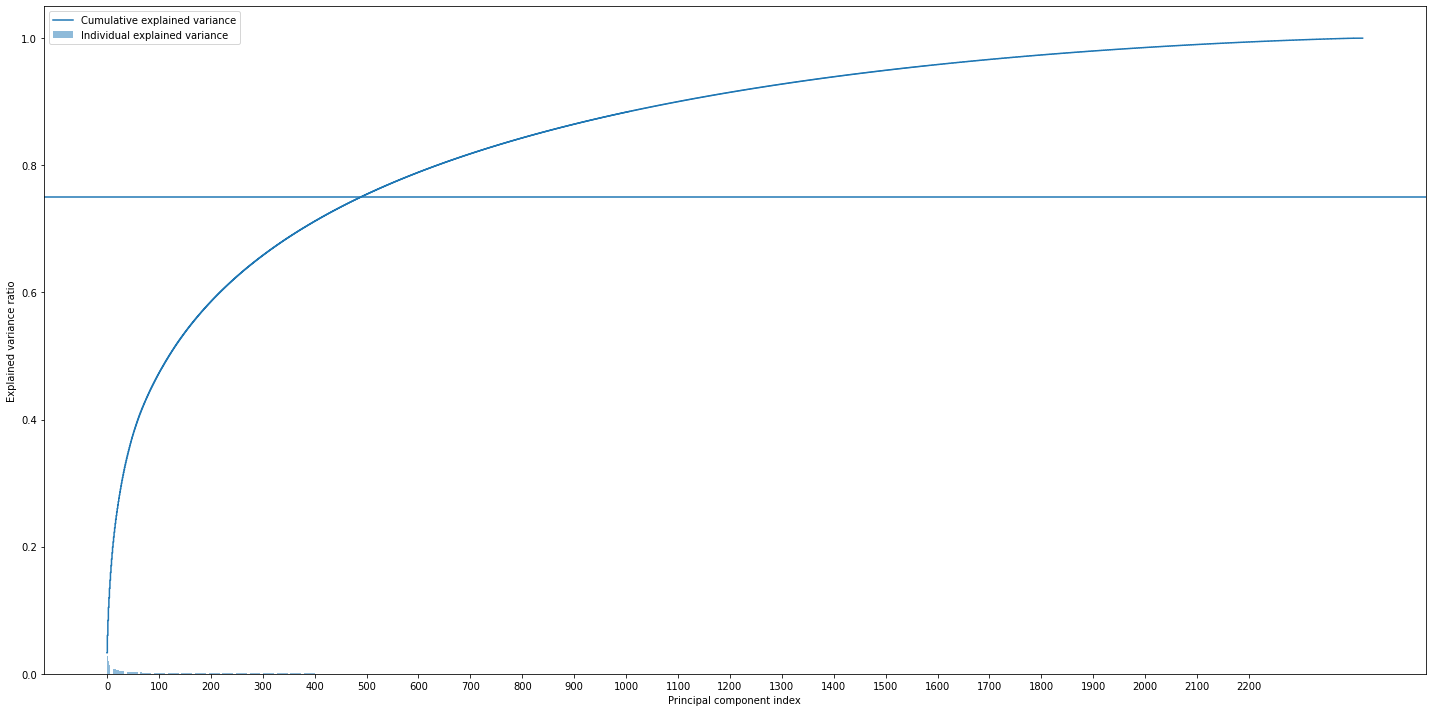

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.figure(figsize = (20,10))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xticks(ticks = np.arange(0,2300,100))
plt.axhline(y=0.75)
plt.show()

##### Which text vectorization technique have you used and why?

Vectorising the preprocessed attributes Movie Dates and Description has sum total of 2126 + 192 = 2318 dimensions. These dimensions will have to be reduced using PCA, which would result in loss of information. Alternatively, the two attributes can be used to model the content into topics using Latent Dirichlet Allocation. This would makes sure that all the topical information about video content are captured without putting any available information to waste.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Preparing dataset for clustering

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
clustering_df = df[['type', 'duration','rating','release_year']]

Encoding TV and Movie ratings into one based on their age reccomendations

Guidelines:

Netflix: Maturity Rating Guidelines

In [ ]:
def topick(row):
  older_kids = ['TV-PG', 'PG', 'TV-Y7', 'TV-Y7-FV']
  kids = ['TV-G', 'G', 'TV-Y']
  teens = ['PG-13','TV-14']
  adult = ['R', 'NC-17', 'TV-MA', 'UR', 'NR']

  rating = 'Others'
  for column in older_kids + kids + teens + adult:
    if row[column] == 1:
      if column in older_kids:
        rating = 'Older Kids'
      elif column in kids :
        rating = 'Kids'
      elif column in teens :
        rating = 'Teens'
      elif column in adult:
        rating = 'Adult'
      
  return rating

ratings = pd.get_dummies(clustering_df['rating']).drop('unknown',axis=1).apply(lambda x: topick(x),axis=1)
     

In [ ]:
clustering_df = pd.concat([clustering_df.drop(['type','rating'],axis =1),pd.get_dummies(ratings).drop('Others', axis=1), pd.get_dummies(clustering_df['type'])], axis =1)

In [ ]:
clustering_df

,duration,release_year,Adult,Kids,Older Kids,Teens,Movie,TV Show
0,4 Seasons,2020,1,0,0,0,0,1
1,93 min,2016,1,0,0,0,1,0
2,78 min,2011,1,0,0,0,1,0
3,80 min,2009,0,0,0,1,1,0
4,123 min,2008,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
7782,99 min,2005,1,0,0,0,1,0
7783,111 min,2015,0,0,0,1,1,0
7784,44 min,2019,1,0,0,0,1,0
7785,1 Season,2019,0,0,1,0,0,1


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
#ENCODING TYPE, RATING
#PROCESSING MOVIE DURATION
#Extracting season numbers and movie duration as separate columns
def duration(row,column):
  text = row['duration'].split()
  if column == 'show':
    if row['Movie'] == 0:
      return int(text[0])
    else:
      return 0
  if column == 'movie':
    if row['Movie'] ==1:
      return int(text[0])
    else:
      return 0
clustering_df['show_duration'] = clustering_df.apply(lambda x: duration(x,'show'),axis =1)

clustering_df['movie_duration'] = clustering_df.apply(lambda x: duration(x,'movie'), axis=1)

In [ ]:
clustering_df.drop('duration', axis = 1, inplace=True)

## Binning Release Years based on decades

In [ ]:
(clustering_df['release_year']).unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
def bin_release_year(row):
  r_year = row['release_year']
  for yr in np.arange(2030,1910,-10):
    if r_year >= yr:
      return (yr)

clustering_df['release_year_bins'] =(clustering_df.apply(lambda x: bin_release_year(x), axis=1))

In [ ]:
clustering_df

,release_year,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins
0,2020,1,0,0,0,0,1,4,0,2020
1,2016,1,0,0,0,1,0,0,93,2010
2,2011,1,0,0,0,1,0,0,78,2010
3,2009,0,0,0,1,1,0,0,80,2000
4,2008,0,0,0,1,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...,...
7782,2005,1,0,0,0,1,0,0,99,2000
7783,2015,0,0,0,1,1,0,0,111,2010
7784,2019,1,0,0,0,1,0,0,44,2010
7785,2019,0,0,1,0,0,1,1,0,2010


In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer


import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

## TOPIC MODELING using GENSIM

In [ ]:
topic_input = df['Processed Description'] + ' ' + df['Processed Movie Deets']

In [ ]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
from gensim.corpora import Dictionary

gensim_paragraphs = (topic_input).apply(lambda row: row.split(' '))
dict_gensim_para = Dictionary(gensim_paragraphs) # dictionary of corpus
dict_gensim_para.filter_extremes(no_below=5, no_above=0.6)

bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs] #creating corpus

## TFIDF VECTOR

In [ ]:
from gensim.models import TfidfModel
tfidf_gensim_para = TfidfModel(bow_gensim_para)
vectors_gensim_para = tfidf_gensim_para[bow_gensim_para]

In [101]:
lda_para_model_n = []
for n in (range(5, 16)):
  lda_model = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=1000, eta='auto', iterations=400,
                            num_topics=n, passes=20, eval_every=None,
                            random_state=42)
  lda_coherence = CoherenceModel(model=lda_model, texts=gensim_paragraphs,
                            dictionary=dict_gensim_para, coherence='c_npmi') 
  print(n,'|', lda_coherence.get_coherence())
  lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

5 | -0.031975860950065
6 | -0.019944568735698432
7 | -0.027401086832076194
8 | -0.02239068915072824
9 | -0.02119957317840014
10 | -0.02358830927702543
11 | -0.02625641363460742
12 | -0.02259799094244981
13 | -0.02035317037251107
14 | -0.02577109660196963
15 | -0.032073432784593146


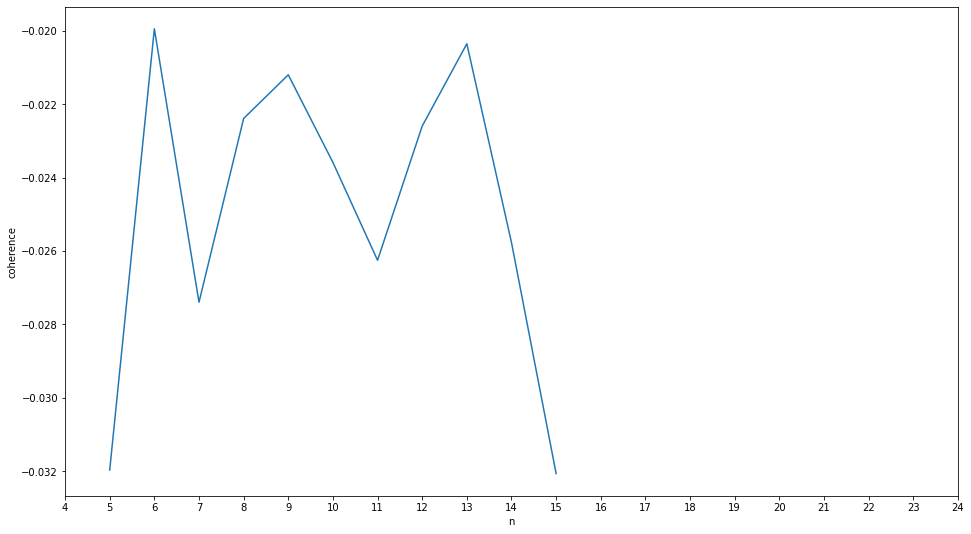

In [103]:
lda_df = pd.DataFrame(lda_para_model_n, columns=["n", "model", "coherence"]).set_index("n")[["coherence"]]
plt.figure(figsize=(16,9))
_ = sns.lineplot(x='n', y='coherence', data=lda_df )
_ = plt.xticks(ticks = np.arange(4,25,1))

In [104]:
lda_df = lda_df.reset_index()
topic_nums = lda_df[lda_df['coherence']==lda_df['coherence'].max()]['n'].to_list()[0]
topic_nums

6

In [105]:
lda_gensim_para = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=2000, eta='auto', iterations=400,
                            num_topics= topic_nums , passes=20, eval_every=None,
                            random_state=42)

In [106]:
#function to display gensim topics
def display_gensim_topics(model):
  gen_list = lda_gensim_para.print_topics()
  for i in range(0,len(gen_list)):
    print('Topic: ',i+1,'\n')
    topics = gen_list[i][1]
    for j in topics.split('+'):
      print(j.split('"')[1])

    print("------\n")

display_gensim_topics(lda_gensim_para)

Topic:  1 

to
of
drama
and
hi
crime
in
thriller
actionadventure
's
------

Topic:  2 

of
and
documentary
in
thi
to
's
on
documentari
from
------

Topic:  3 

to
her
hi
drama
comedy
's
and
he
with
when
------

Topic:  4 

to
and
of
in
actionadventure
’
hi
an
s
when
------

Topic:  5 

and
drama
in
of
their
to
with
comedy
an
romance
------

Topic:  6 

and
comedy
in
of
to
hi
''
thi
``
on
------



In [107]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8234cbea62227e448a4a754397cd9381bff08808dd915577a7a648e8f499a6e8
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=f46f79087c4532e8f4cef30e118bf0d6066cf689de739f2b6fd78e352aa94dc5
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [108]:
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [109]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(lda_gensim_para, bow_gensim_para, dict_gensim_para)

p

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.099019  0.089385       1        1  22.747294
4     -0.017825  0.034605       2        1  17.878265
1      0.167317 -0.104584       3        1  17.567540
0     -0.120656 -0.085970       4        1  15.690375
3     -0.061248 -0.040715       5        1  15.017427
5      0.131431  0.107279       6        1  11.099098, topic_info=             Term         Freq        Total Category  logprob  loglift
206   documentary  1069.000000  1069.000000  Default  30.0000  30.0000
200           thi  1182.000000  1182.000000  Default  29.0000  29.0000
277        comedy  2312.000000  2312.000000  Default  28.0000  28.0000
184           her  1829.000000  1829.000000  Default  27.0000  27.0000
192         crime   573.000000   573.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1061       family    95.577576   510.786822   Topic6  -5.3112   0.5223
259        friend    95.853865   536.197302   Topic6  -5.3083   0.4766
360            at    92.914493   659.257235   Topic6  -5.3394   0.2389
254            as   100.043325  1056.909883   Topic6  -5.2655  -0.1592
62          their    94.086390  1433.071926   Topic6  -5.3269  -0.5251

[480 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1421      5  0.321661    !
1421      6  0.664766    !
708       6  0.998575   ''
1564      1  0.982360   'd
42        1  0.346882   's
...     ...       ...  ...
311       5  0.192396    –
311       6  0.146828    –
468       5  0.995466    ’
757       3  0.993757    “
758       3  1.002463    ”

[956 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 1, 4, 6])

In [110]:
lda = {}
for i in range(0,lda_gensim_para.num_topics):
  lda[f'Topic {i}'] = np.zeros(df.shape[0])

In [111]:
for i, row in enumerate(lda_gensim_para[bow_gensim_para]):
  for topic in row:
    lda[f'Topic {topic[0]}'][i] = topic[1] 

In [112]:
topic_model_df = pd.DataFrame(lda)

In [113]:
topic_model_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,0.000000,0.000000,0.000000,0.520313,0.301861,0.155904
1,0.000000,0.000000,0.000000,0.967517,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.968939,0.000000,0.000000
3,0.266360,0.251847,0.067419,0.399747,0.000000,0.000000
4,0.243806,0.299027,0.000000,0.000000,0.434295,0.000000
...,...,...,...,...,...,...
7782,0.000000,0.000000,0.648084,0.000000,0.326001,0.000000
7783,0.000000,0.000000,0.723386,0.000000,0.252588,0.000000
7784,0.000000,0.582956,0.000000,0.000000,0.000000,0.389039
7785,0.000000,0.959916,0.000000,0.000000,0.000000,0.000000


In [114]:
def topic_input(row):
  highest = 0
  top = 'None'
  for topic in topic_model_df.columns:
    if row[topic] > highest:
      highest = row[topic]
      top = f'Topic {int(topic[-1])+1}'
  return top

topic = topic_model_df.apply(lambda x:topic_input(x),axis=1)

## Concatenating clustering_df with topic models

In [118]:
clustering_df

,release_year,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins
0,2020,1,0,0,0,0,1,4,0,2020
1,2016,1,0,0,0,1,0,0,93,2010
2,2011,1,0,0,0,1,0,0,78,2010
3,2009,0,0,0,1,1,0,0,80,2000
4,2008,0,0,0,1,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...,...
7782,2005,1,0,0,0,1,0,0,99,2000
7783,2015,0,0,0,1,1,0,0,111,2010
7784,2019,1,0,0,0,1,0,0,44,2010
7785,2019,0,0,1,0,0,1,1,0,2010


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [119]:
# Scaling your data
#vectorizer_clustering = pd.concat([clustering_df.drop(['release_year','Movie','TV Show'], axis=1), pd.get_dummies(clustering_df['release_year'])], a


In [120]:
vectorizer_clustering = pd.concat([clustering_df.drop(['release_year'], axis=1),], axis =1)

In [121]:
vectorizer_clustering

,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins
0,1,0,0,0,0,1,4,0,2020
1,1,0,0,0,1,0,0,93,2010
2,1,0,0,0,1,0,0,78,2010
3,0,0,0,1,1,0,0,80,2000
4,0,0,0,1,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...
7782,1,0,0,0,1,0,0,99,2000
7783,0,0,0,1,1,0,0,111,2010
7784,1,0,0,0,1,0,0,44,2010
7785,0,0,1,0,0,1,1,0,2010


In [122]:
scaler = MinMaxScaler()
X_rescale = scaler.fit_transform(vectorizer_clustering)
#dataset contains degree of belonging of document to each topic concatenated to scaled Dataframe 
X = pd.concat([pd.DataFrame(X_rescale,columns = vectorizer_clustering.columns ),(topic_model_df)],axis=1)

In [123]:
X

,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,1.0,0.0,0.0,0.0,0.0,1.0,0.2500,0.000000,1.0,0.000000,0.000000,0.000000,0.520313,0.301861,0.155904
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.298077,0.9,0.000000,0.000000,0.000000,0.967517,0.000000,0.000000
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.250000,0.9,0.000000,0.000000,0.000000,0.968939,0.000000,0.000000
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0000,0.256410,0.8,0.266360,0.251847,0.067419,0.399747,0.000000,0.000000
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0000,0.394231,0.8,0.243806,0.299027,0.000000,0.000000,0.434295,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.317308,0.8,0.000000,0.000000,0.648084,0.000000,0.326001,0.000000
7783,0.0,0.0,0.0,1.0,1.0,0.0,0.0000,0.355769,0.9,0.000000,0.000000,0.723386,0.000000,0.252588,0.000000
7784,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,0.141026,0.9,0.000000,0.582956,0.000000,0.000000,0.000000,0.389039
7785,0.0,0.0,1.0,0.0,0.0,1.0,0.0625,0.000000,0.9,0.000000,0.959916,0.000000,0.000000,0.000000,0.000000


In [124]:
X = X.to_numpy()

In [125]:
X.shape

(7787, 15)

## Performing Hopkins test for uniform distribution to check if clustering is possible on the dataset

In [126]:
pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 4.9 MB/s 
     |████████████████████████████████| 9.4 MB 48.7 MB/s 
     |████████████████████████████████| 3.3 MB 49.3 MB/s 
     |████████████████████████████████| 15.4 MB 45.6 MB/s 
     |████████████████████████████████| 965 kB 57.0 MB/s 
     |████████████████████████████████| 295 kB 63.2 MB/s 
     |████████████████████████████████| 26.3 MB 76.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  At

In [127]:
pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 5.2 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyclustertend 1.8.2 requires numba<0.55.0,>=0.54.1, but you have numba 0.53.0 which is incompatible.


In [128]:
from pyclustertend import hopkins
hopkins(X,150)

0.048990622812376074

In [129]:
X.shape

(7787, 15)

## CREATING DICTIONARY FOR REPORT

In [130]:
clustering_report = {
    'Algorithm':[],
    'Parameters':[],
    'Clusters':[],
    'Silhouette Coefficient':[],
    'Davies-Bouldin Index': [],
    'Calinski-Harbaz Score': []
}

In [131]:
def update_report(algo_name, details,clusters, sil_score, db_index, ch_score):
  data = [algo_name, details, clusters,sil_score, db_index, ch_score]
  for i,detail in enumerate(clustering_report):
    clustering_report[detail].append(data[i])

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***